In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential ,load_model
from tensorflow.keras.layers import Dense, Input,MaxPooling2D,Conv2D,Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample # downsample the dataset
from sklearn.model_selection import train_test_split # split data into training and testing sets
from sklearn.svm import SVC # this will make a support vector machine for classificaiton
from sklearn.model_selection import GridSearchCV #this will do cross validation
from sklearn.metrics import confusion_matrix # this creates a confusion matrix
from sklearn.decomposition import PCA # to perform PCA to plot the data
from sklearn.metrics import precision_score, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from PIL import Image
import random
import glob
import os
import cv2
import pandas as pd

In [6]:
# pre processing

# Specify the directory path
directory_path = './resizedImage256'

# Get all files in the directory
files = glob.glob(directory_path + '/*')
file_types = set()
img_height = 256 
img_width = 256
Xdata = []
Ydata = []
for a in files:
    #file_name, file_extension = os.path.splitext(a)
    #file_types.add(file_extension)
    image = cv2.imread(a)
    #image = cv2.resize(image, (img_width,img_height))
    #Image.fromarray(image).save('./resizedImage256/'+file_name.replace("./data\\", "")+file_extension)
    #print('./data/resized256/'+file_name+file_extension)
    #cv2.imwrite('./resizedImage256/'+file_name+file_extension, image)
    image = image / 255.0 # for normallization and having better accuracy
    Xdata.append(image)
    Ydata.append(int("happy" in a))
del files    

In [7]:
#train - test split
print(file_types)
X_train_data = []
X_test_data = []
Y_train_data = []
Y_test_data = []

data_size = len(Xdata)
train_size = int(.80 * data_size);

for i in range(0,train_size):
    rand_index = random.randint(0, len(Xdata)-1)
    X_train_data.append(Xdata[rand_index])
    Y_train_data.append(Ydata[rand_index])
    del Xdata[rand_index]
    del Ydata[rand_index]

X_test_data = Xdata.copy()
Y_test_data = Ydata.copy()
print("whole data "+str(len(Xdata)))
print("train data "+str(len(X_train_data)))
print("test data "+str(len(X_test_data)))

del Xdata
del Ydata


set()
whole data 398
train data 1590
test data 398


In [4]:
#print("each data shape "+str(Xdata[0].shape))
X_train_data = np.array(X_train_data, dtype=np.float32)
Y_train_data = np.array(Y_train_data, dtype=np.float32)
X_train_data.shape

(1590, 256, 256, 3)

In [8]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(filters=16,kernel_size=(3, 3)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  
])
model.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 125, 125, 16)   │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     7,872,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,886,481 (30.08 MB)

 Trainable params: 7,886,481 (30.08 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.fit(X_train_data, Y_train_data,batch_size=64, epochs=300,verbose=1)
del X_train_data
del Y_train_data

Epoch 1/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 367ms/step - accuracy: 0.5004 - loss: 5.4861
Epoch 2/300
17/25 ━━━━━━━━━━━━━━━━━━━━ 2s 351ms/step - accuracy: 0.5328 - loss: 0.8139

KeyboardInterrupt: 

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


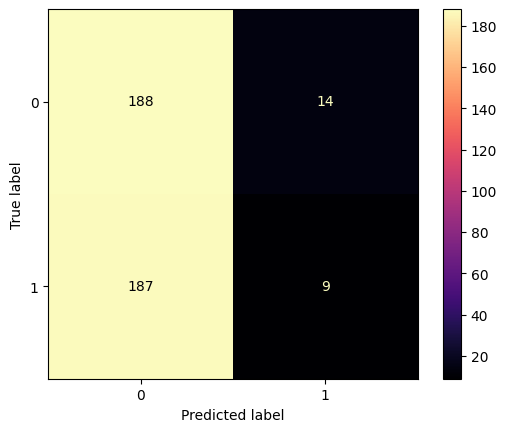

Precision: 0.3913
Accuracy: 0.4950
Sensitivity (Recall): 0.0459


In [11]:
X_test_data = np.array(X_test_data, dtype=np.float32)
Y_test_data = np.array(Y_test_data, dtype=np.float32)
predictions1 = model.predict(X_test_data)
tensor_predictions = (np.array(predictions1)>= 0.5).astype(int)
plot_confusion_mat(tensor_predictions,Y_test_data,"Tensor flow model confusion matrix")   

In [9]:
def plot_confusion_mat(predictions,y_test1,title):
    cm = confusion_matrix(y_test1, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap = 'magma')
    plt.savefig('images/'+title+'.png')
    plt.show()
    # Calculate precision, accuracy, and sensitivity
    precision = precision_score(y_test1, predictions)
    accuracy = accuracy_score(y_test1, predictions)
    sensitivity = recall_score(y_test1, predictions)

    print(f'Precision: {precision:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Sensitivity (Recall): {sensitivity:.4f}')   

In [10]:
model  = load_model('models/happy-sad-colab-trained-model.h5')

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 16)   │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    15,745,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,767,315 (60.15 MB)

 Trainable params: 15,767,313 (60.15 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


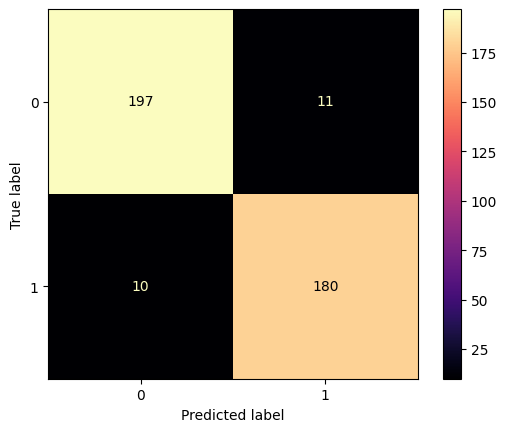

Precision: 0.9424
Accuracy: 0.9472
Sensitivity (Recall): 0.9474


In [12]:
X_test_data = np.array(X_test_data, dtype=np.float32)
Y_test_data = np.array(Y_test_data, dtype=np.float32)
predictions1 = model.predict(X_test_data)
tensor_predictions = (np.array(predictions1)>= 0.5).astype(int)
plot_confusion_mat(tensor_predictions,Y_test_data,"happy-sad conv colab model")   

In [21]:

# Get all files in the directory
files = glob.glob('./my_images/*')
img_height = 256 
img_width = 256
my_images = []
for a in files:
    file_name, file_extension = os.path.splitext(a)
    image = cv2.imread(a)
    #image = cv2.resize(image, (img_width,img_height))
    #print(file_name)
    #Image.fromarray(image).save(a)
    image = image / 255.0 # for normallization and having better accuracy
    my_images.append(image)
print(len(my_images))
predictions = [model.predict(np.expand_dims(img, axis=0)) for img in my_images]

16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


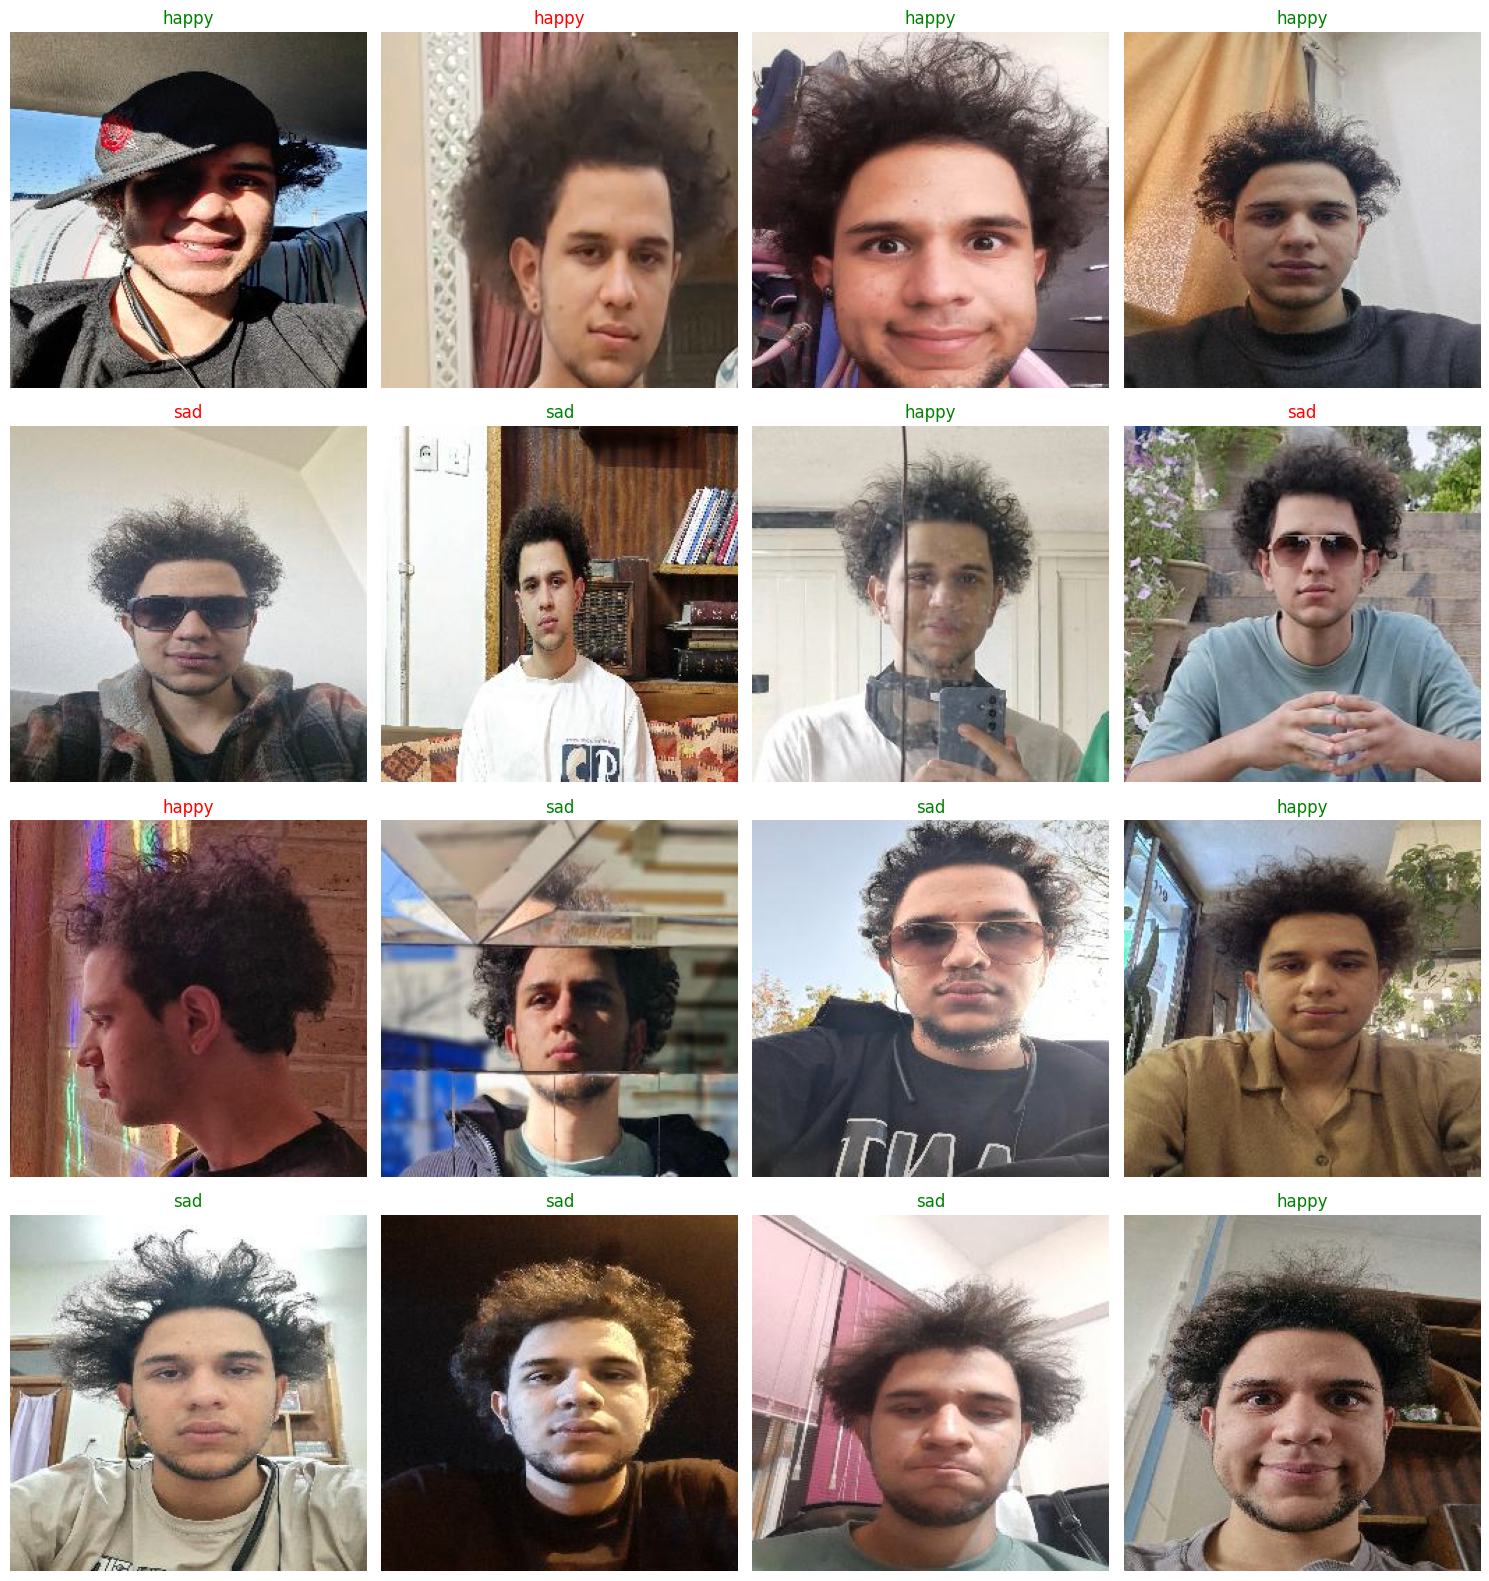

My Images analyze correctness 0.75


In [33]:

# Set up the plot
plt.figure(figsize=(15, 16))
corrects = 0
# Plot each image in a 4-column grid
for i in range(len(my_images)):
    plt.subplot(4, 4, i + 1)  # 3 rows, 4 columns, and the (i+1)-th image
    res = (predictions[i]>0.5 and ("happy" in files[i])) or (predictions[i]<0.5 and ("happy" not in files[i]))
    if res:
        corrects+=1
    plt.title("happy" if predictions[i] > 0.5 else "sad",color="green" if res else "red")
    plt.imshow(my_images[i])
    plt.axis('off')  # Turn off axis labels
plt.tight_layout()
plt.savefig('my-images-analyze.png')
plt.show()
print(f"My Images analyze correctness {corrects/len(my_images):.2f}")